In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


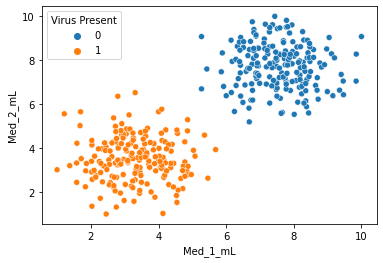

In [5]:
# We are plotting here to see the seperatiion b/w the classes
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present');

#### So we will first manually plot a hyperplane on this 

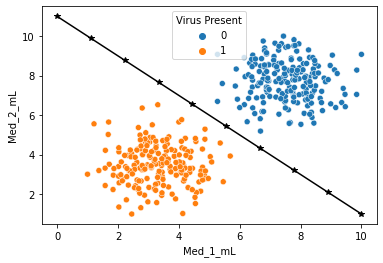

In [20]:
# We are plotting here to see the seperatiion b/w the classes
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present');

# Create a HYPERPLANE:-
# What we are going to do is create a seperating line, more accurately a y=mx+b line

x = np.linspace(0,10,10)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,color='black',marker='*');

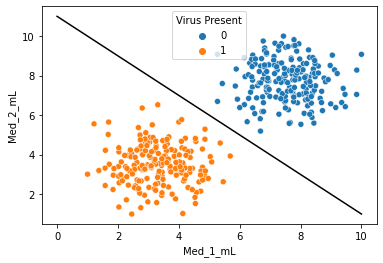

In [21]:
# We are plotting here to see the seperatiion b/w the classes
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present');

# Create a HYPERPLANE:-
# What we are going to do is create a seperating line, more accurately a y=mx+b line

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,color='black');

#### Now we need to really understand how a SVM is able to figure out the best seperating hyperplane, i.e. what is the best intercept and slope value that seperates out these two classes.

# SVM

First we will see how a Support Vector classifier works and later we will build on to a SVM.

In [22]:
from sklearn.svm import SVC

In [25]:
#help(SVC)

The other thing we're going to do is in order to just explore this algorithm, I want to skip any scaling or even really a train to split since we're essentially just visualizing this and seeing the different effects.

In [26]:
X = df.drop('Virus Present',axis=1)

In [27]:
y = df['Virus Present']

In [39]:
#help(SVC)

In [28]:
# create model
model = SVC(kernel='linear', C=1000)

As we know the C - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

There are many options for the kernel - kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf' || best one is rbf which is the default value too, but for learning we will use the linear.

In [29]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

Note again we did not do a train test split because we are just visualizing here.

#### Now we will be using the custom margin plot .py file that we created, svm_margin_plot.py

In [31]:
from svm_margin_plot import plot_svm_boundary

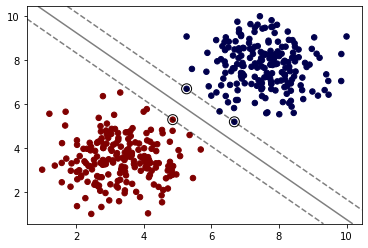

In [32]:
plot_svm_boundary(model, X, y)

So this plot plots out the hyperplane, the margins and the support vetors.

#### So let's continue with exploring the hyper parameters i.e., C - regularization parameter and the variety of kernels available

Now if you set C - the regularization parameter within scikit-learn, it is inversely proportional to the amount of points you allow inside margin.

So if you have very small C value or C=0, them you are allowing a lot of points to be within the margin.

And if the C value is big you are allowing very less points to be within the margin.

In [47]:
model1 = SVC(kernel='linear', C=0.5)

In [48]:
model1.fit(X,y)

SVC(C=0.5, kernel='linear')

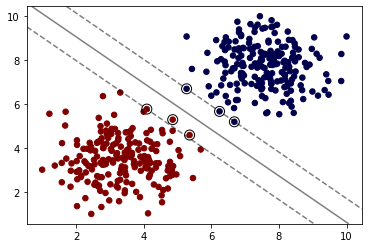

In [49]:
plot_svm_boundary(model1, X, y)

So we can see with C-value going down we have more points within the margin.

In [50]:
model1 = SVC(kernel='linear', C=0.005)

In [51]:
model1.fit(X,y)

SVC(C=0.005, kernel='linear')

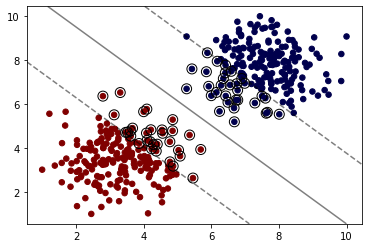

In [52]:
plot_svm_boundary(model1, X, y)

So we can see with C-value going down we have more points within the margin.

### We will use cross validation to find out the best C value

## Model using kernel = rbf :- radial basis kernel

In [57]:
model3 = SVC(kernel='rbf', C=1)
model3.fit(X,y)

SVC(C=1)

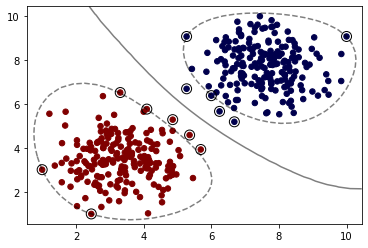

In [58]:
plot_svm_boundary(model3,X,y)

##### Note that earlier our kernel was linear so we kinda had a linear plot but here we have a different plot as the kernel is rbf.

In [59]:
# Let's try a smaller C value now
model3 = SVC(kernel='rbf', C=0.1)
model3.fit(X,y)

SVC(C=0.1)

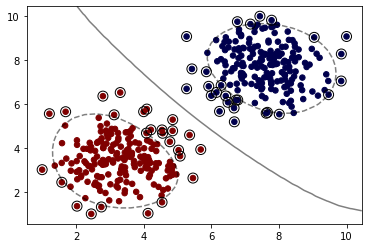

In [60]:
plot_svm_boundary(model3,X,y)

Note the points within the circle are the actual points and the circle is the margin we saw earlier so the points outside this circe are not outside, they are essentially the support vectors between the hyperplane and the margin.

This plot looks kinda weird only because actually it is projected in a higher dimension, but because we are bringing it back to the lower dimension, we get a plot like this, which seems to have points outside the margin.

#### The othe hyperparamter we need to consider while using the rdf is the gamma parameter.

gamma : {'scale', 'auto'} or float, default='scale'
          Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
  
        - if gamma='scale' (default) is passed then it uses
          1 / (n_features * X.var()) as value of gamma,
        - if 'auto', uses 1 / n_features.
    
        .. versionchanged:: 0.22
           The default value of gamma changed from 'auto' to 'scale'.

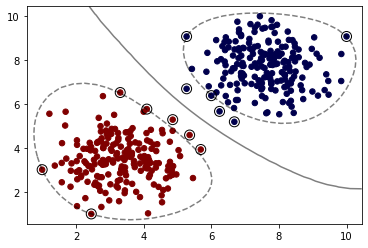

In [63]:
model4 = SVC(kernel='rbf', C=1, gamma='scale')
model4.fit(X,y)
plot_svm_boundary(model4,X,y)

As scale is default value of gamma we see no change

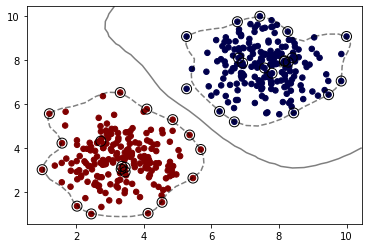

In [65]:
model4 = SVC(kernel='rbf', C=1, gamma='auto')
model4.fit(X,y)
plot_svm_boundary(model4,X,y)

But as we use gamma = 'auto' we see that we are picking more noise from these support vectors.

In general gamma defines how much influence a single training example has. 

So that means as gamma gets larger, the closer the other examples have to be in order to be affected.

#### Now we can try different gamma values

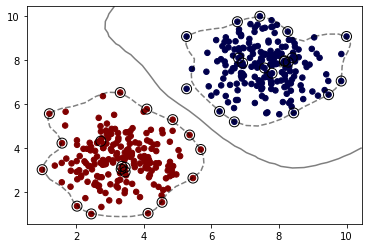

In [66]:
model4 = SVC(kernel='rbf', C=1, gamma=0.5)
model4.fit(X,y)
plot_svm_boundary(model4,X,y)

0.5 is essentially the same as auto as it uses 1/n_features = 1/2 = 0.5

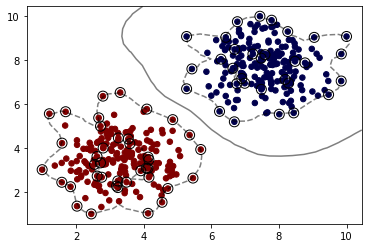

In [67]:
model4 = SVC(kernel='rbf', C=1, gamma=0.9)
model4.fit(X,y)
plot_svm_boundary(model4,X,y)

So as gamma gets larger and larger, you'll notice it's starting to fit more and more to that margin to these support vectors.

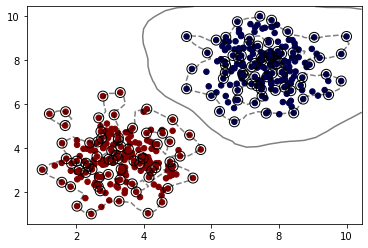

In [68]:
model4 = SVC(kernel='rbf', C=1, gamma=2)
model4.fit(X,y)
plot_svm_boundary(model4,X,y)

We can see here that for an extreme value of gamma, that margin is picking up a ton of information, essentially overfitting to your data.

##### Thus essentially the gamma='scale' is a good option as it is going to balance a bias variance trade off of how much info is actually garnered from the support vectors.

#### Let's check out the other two values of kernels - sigmoid and polynomial kernel.

In [71]:
model5 = SVC(kernel='sigmoid')
model5.fit(X,y)

SVC(kernel='sigmoid')

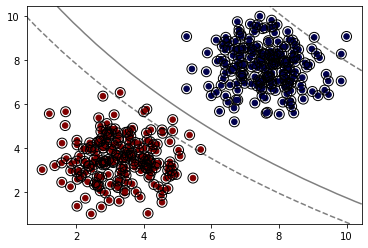

In [72]:
plot_svm_boundary(model5, X, y)

So in general a sigmoid kenerl depends on a lot of the points to be support vectors, so it is not thst reliable and useful in this case.

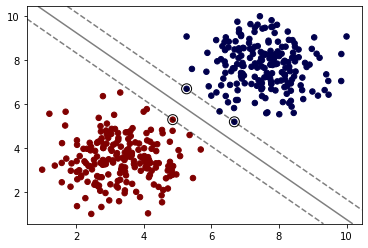

In [74]:
model6 = SVC(kernel='poly',degree=1)
model6.fit(X,y)
plot_svm_boundary(model6,X,y)

This looks more like a linear kernel, which is obvious because with polynomial we only took degree one.

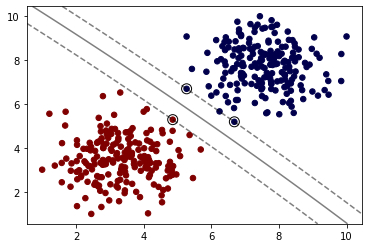

In [75]:
model6 = SVC(kernel='poly',degree=2)
model6.fit(X,y)
plot_svm_boundary(model6,X,y)

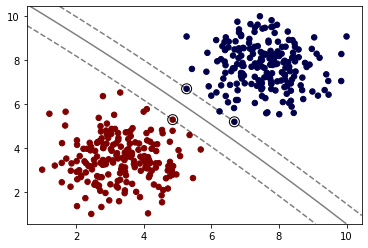

In [76]:
model6 = SVC(kernel='poly',degree=3)
model6.fit(X,y)
plot_svm_boundary(model6,X,y)

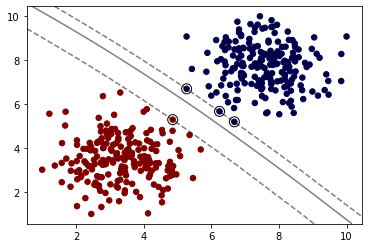

In [78]:
model6 = SVC(kernel='poly',degree=10)
model6.fit(X,y)
plot_svm_boundary(model6,X,y)

So as we increase the degree we see the curve

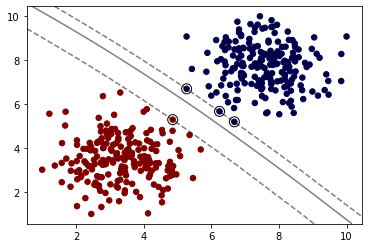

In [87]:
model6 = SVC(kernel='poly',degree=10,C=0.005)
model6.fit(X,y)
plot_svm_boundary(model6,X,y)

We can see that for this dataset case using higher order polynomial kernel is not much different than linear kernel, so it might be best to use linear, but this might not be the case for other datasets.

### Now lets go ahead and do gridsearch which we might always have to do incase of SVM.

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
svm = SVC()

parameter_grid = {'kernel':['linear','rbf'],'C':[0.01,0.1,1]}

In [91]:
grid_model = GridSearchCV(estimator=svm, param_grid=parameter_grid)

In [92]:
grid_model.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [93]:
grid_model.best_estimator_.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [94]:
grid_model.best_params_

{'C': 0.01, 'kernel': 'linear'}

#### So we can see the model chose these as best parameters

### Let's use this model for predictions

In [96]:
preds = grid_model.predict(X)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [98]:
accuracy_score(y, preds)

1.0

In [100]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [101]:
confusion_matrix(y,preds)

array([[200,   0],
       [  0, 200]], dtype=int64)

### We see that in this case we get an absolutely perfect prediction model becuase we have fed all the real y values before hand and not done ny train_test_split, so our model previously has all the values and it is trying to predict the same.